In [ ]:
import numpy as np
from sympy import exp, sin, cos, pi, integrate, symbols, Sum
import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting import plot, plot3d

In [ ]:
x, y, t = symbols('x y t')
n = symbols('n', positive=True, integer=True)

## Simulação


Vamos plotar o gráfico da solução

$$
    \rho(x, t) =   \ \sum_{n=1} Cn \text{sen} \left(\frac{n \pi}{L}x \right) \
  { e^{  D_0 t \left[    \frac{R(t)}{t} - \left(\frac{n \pi}{L} \right)^2    \right] }}
$$


\\
$$
      Cn =  \frac{2}{L} \int_{0} ^{L} g(y)\  \text{sen} \left(\frac{n \pi}{L} y \right) \ dy  \ = \frac{N_0 }{L^2 }   \int_{0} ^{L}  \text{sen} \left(\frac{n \pi}{L} y \right) \ dy              
$$

\\
$$
R(t) = r_1 t + \frac{r_2 p}{2 \pi} \left[ 1 - \text{cos}   \left ( \frac{2 \pi t}{p} \right )\right]   
$$

### Função de crescimento

\\
$$
R(t) = r_1 t + \frac{r_2 p}{2 \pi} \left[ 1 - \text{cos}   \left ( \frac{2 \pi t}{p} \right )\right]   
$$

In [ ]:
# parâmetros
L = 5
T = 10
NN = 100
N0 = 100


#parametros
D0 = 1.5
r1 = 0.5  #taxa basica de reprodução, quanto maior r1, maior será R
r2 = 0.2  #oscilação da reprodução ou sazonalidade, se r2=0, recai no crescimento constante do modelo de malthus
        # quanto maior r2, maior será o pico de reprodução em R, onde r1 é a taxa base.
p = T/5  # regula a frequencia de oscilação, quanto menor, maior a frequencia.
      #exemplo se T é o tempo em anos, tomando p = 2, seria uma oscilação na reprodução a cada 2 anos.

#funções
R = r1*t + (r2*p)/(2*pi)*(1 - cos(2*pi*t/p))
fcresc = exp(R)


### Solução

Coeficiente de Fourier

\\
$$
      Cn =  \frac{2}{L} \int_{0} ^{L} g(y)\  \text{sen} \left(\frac{n \pi}{L} y \right) \ dy  \ = \frac{N_0 }{L^2 }   \int_{0} ^{L}  \text{sen} \left(\frac{n \pi}{L} y \right) \ dy              
$$

In [ ]:
Cn = (N0/L**2 ) * sp.integrate(sp.sin(n*pi*y/L), (y,0,L) )

Cn

-20.0*(-1)**n/(pi*n) + 20.0/(pi*n)

In [ ]:
tempo = exp( D0* (R- t*(n*pi/L)**2 ))

Densidade

$$
    \rho(x, t) =   \ \sum_{n=1} Cn \text{sen} \left(\frac{n \pi}{L}x \right) \
  { e^{  D_0 t \left[    \frac{R(t)}{t} - \left(\frac{n \pi}{L} \right)^2    \right] }}
$$


In [ ]:
rho = Sum(Cn* sin(n*pi/L * x)  * tempo, (n,1,50))

#rho_n = Cn * sin(n*pi/L *x) * exp(D0 * (R - t*(n*pi/L)**2    )    )
#rho_n

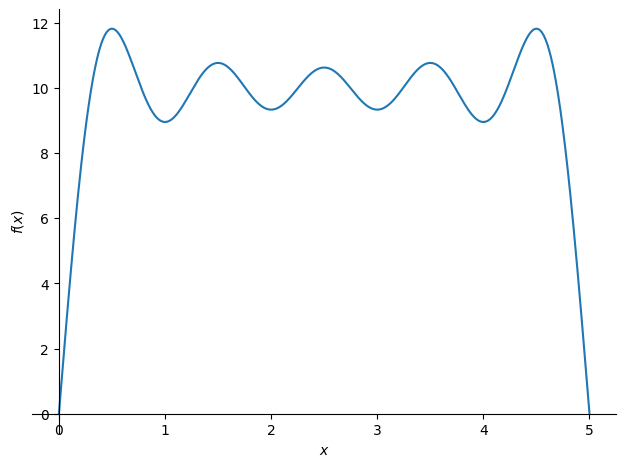

In [ ]:
plot(Sum(Cn*sin(n*pi/L * x),(n,1,10) ),(x,0,L))

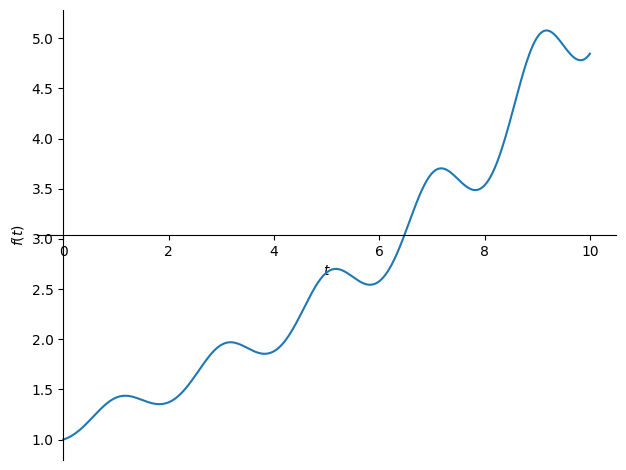

In [ ]:
plot((tempo).subs(n,1), (t,0,10))

Observe que, para cada m fixado, a função R(t) tanto pode resulta numa imagem superior a Em(t), quanto pode ser inferior.

O que acontece é que, pelo principio da superposição, cada $\rho_n$ compoe uma das parcelas da solução geral. Porém, nesse exemplo específico, para n=m=1, $\rho_1$ cresce de forma exponencial, enquanto todos os outros decrescem a zero. Porém, se tratando de uma série infinita, o crescimento de $\rho_1$ é superior ao decrescimento dos gerais, uma afirmação poderosa e talvez difícil de demonstrar matematicamente, mas que pode ser facilmente vista no gráfico.

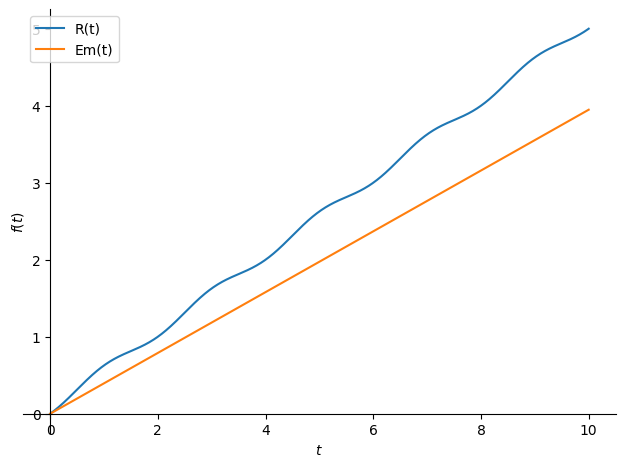

In [ ]:
m = 1
Em = t*( m*pi / L)**2
label = ['R(t)', 'Em(t)']
plot(R,Em, (t,0,10), legend=True, label=label)


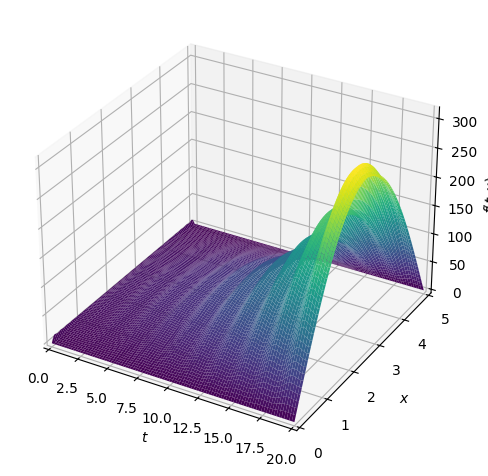

In [ ]:
grafico = plot3d(rho, (t,0,20), (x,0,L) )
grafico

In [ ]:
grafico.fig.savefig('grafico_3d_t20.png')
